<a href="https://colab.research.google.com/github/imazzala/Introduccion-Machine-Learning-Pytorch/blob/main/TrabajandoConTensores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd



#Trabajando con Tensores

Version del framework que estamos usando

In [ ]:
torch.__version__

'1.7.0+cu101'

Generamos un tensor de dimensión 2x2 de unos con el método **ones**

In [ ]:
tensor_a = torch.ones(2,2)
tensor_a

tensor([[1., 1.],
        [1., 1.]])

El método Tensor nos permite generar un tensor aleatorio. Por otro lado Uniform permite transformar el tensor que deseemos en un tensor cuyas componentes varían entre 0 y 1

In [ ]:
tensor_b = torch.Tensor(2,2)
print(tensor_b)
tensor_b.uniform_(0,1)

tensor([[3.8026e-35, 0.0000e+00],
        [1.5414e-43, 1.6115e-43]])


tensor([[0.4557, 0.3266],
        [0.1753, 0.2473]])

El método rand permite generar un vector entre 0 y 1

In [ ]:
tensor_c = torch.rand(2,2)
tensor_c

tensor([[0.0760, 0.4738],
        [0.4898, 0.6651]])

In [ ]:
result = tensor_b + tensor_c
result

tensor([[0.5317, 0.8004],
        [0.6651, 0.9124]])

El método **shape** permite ver la forma del tensor y el método view nos permite ordenar los componentes de otra forma, en este caso lo convertimos al tensor de 2x2 en uno de 4x1 (4 filas y 1 columna)


In [ ]:
result.shape

torch.Size([2, 2])

In [ ]:
reshaped = result.view(4,1)
reshaped

tensor([[0.5317],
        [0.8004],
        [0.6651],
        [0.9124]])

El método tensor nos permite generar uno con los valores que nosotros deseemos, o sea nos permite inicializar un tensor con los valores que querramos.

In [ ]:
points = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
points

tensor([[1., 2.],
        [3., 4.]])

Podemos reasignar valores dentro del tensor al igual que con una matriz, en este caso estamos modificando el valor del componente ubicado en la primer fila y en la segunda columna (recordemos que Python cuenta desde 0)

In [ ]:
points[0][1] = 2.5
points

tensor([[1.0000, 2.5000],
        [3.0000, 4.0000]])

Con el método **storage** podemos ver como están almacenados los datos en memoria. 

In [ ]:
points.storage()

 1.0
 2.5
 3.0
 4.0
[torch.FloatStorage of size 4]

Una vez sabiendo como están almacenados los valores del tensor en memoria, podemos saber como acceder a ellos a través del método Stride. Para ello como explicó en uno de los comentarios @ikstvn:

En la imagen, la primera dimensión del tensor esta en azul y la segunda en rojo. Así pues, para obtener el el numero 3 de manera física se hace el cálculo stride:
1(fila del numero 3) X 2(dimensión stride de la fila) + 0(columna del numero 3)X1 (dimensión stride de la columna) = 2
El 2 significa que debes hacer dos saltos en memoria para obtener el numero 3.

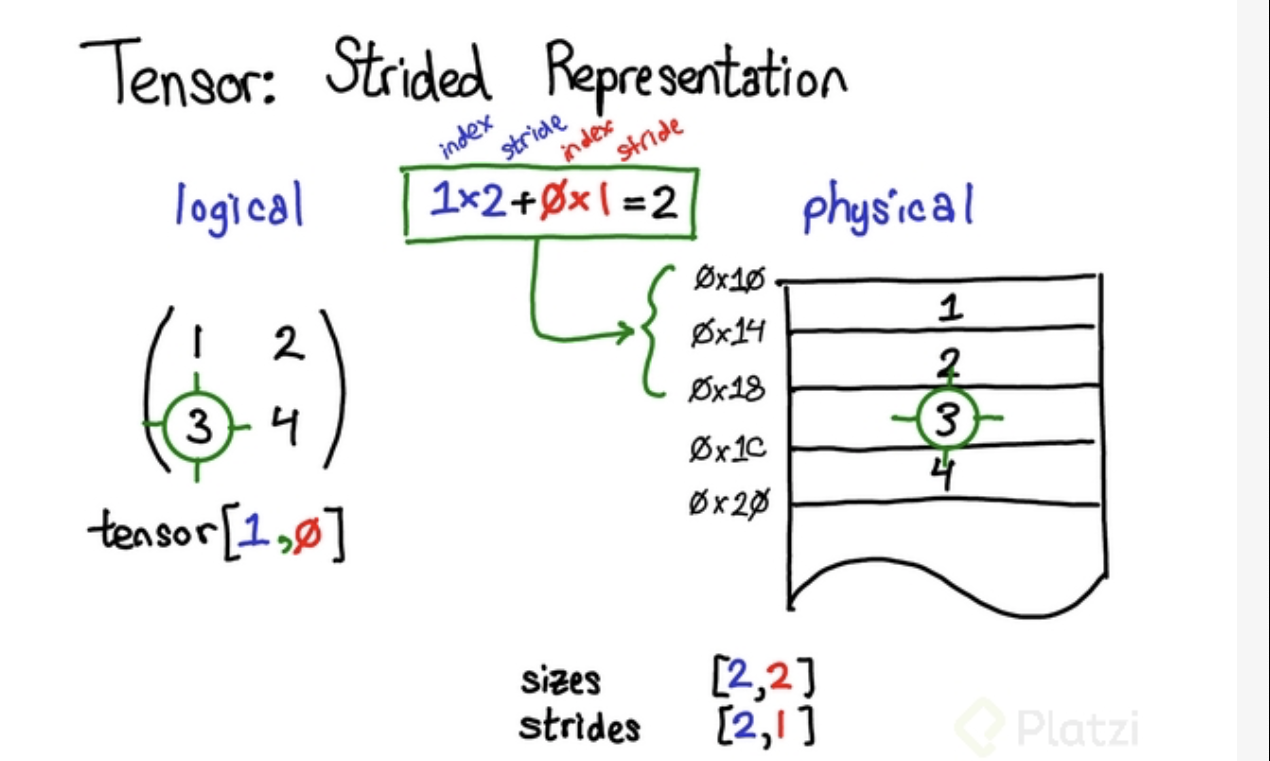

In [ ]:
points.stride()

(2, 1)

Podemos trasponer la matriz y comprobar como cambia el Stride. 

In [ ]:
p_t = points.t()
p_t, p_t.stride()

(tensor([[1.0000, 3.0000],
         [2.5000, 4.0000]]), (1, 2))

También podemos agregar dimensiones a un tensor a través del método **unsqueeze**. Entre los parámetros debemos ingresar el tensor y en que dimensión lo vamos a hacer, por ejemplo 0 agrega una dimensión en la misma fila, 1 lo hace sobre la misma columna.





In [ ]:
tensor_x = torch.tensor([1,2,3,4])
torch.unsqueeze(tensor_x,0)


tensor([[1, 2, 3, 4]])

El framework permite la interacción con la librería Numpy. A traevés del método from_numpy(nombre_array) podemos convertir un array o matriz de Numpy en un tensor de Pytorch. 



In [ ]:
numpyArray = np.random.rand(2,2)
from_numpy = torch.from_numpy(numpyArray)
from_numpy

tensor([[0.3343, 0.7586],
        [0.2973, 0.1087]], dtype=torch.float64)

# Representando DataSets con Tensores

In [ ]:
print(from_numpy)
print("\nCalculo de la media de los 4 elementos del tensor:")
print(torch.mean(from_numpy))
print("\nCalculo de la media de los elementos por fila:")
print(torch.mean(from_numpy, dim = 0))
print("\nCalculo de la media de los elementos por columna: ")
print(torch.mean(from_numpy, dim = 1))

tensor([[0.3343, 0.7586],
        [0.2973, 0.1087]], dtype=torch.float64)

Calculo de la media de los 4 elementos del tensor:
tensor(0.3747, dtype=torch.float64)

Calculo de la media de los elementos por fila:
tensor([0.3158, 0.4337], dtype=torch.float64)

Calculo de la media de los elementos por columna: 
tensor([0.5464, 0.2030], dtype=torch.float64)


In [ ]:
torch.std(from_numpy, dim = 1)

tensor([0.3000, 0.1333], dtype=torch.float64)

In [ ]:
torch.save(from_numpy, 'tensor.t')

In [ ]:
load = torch.load('tensor.t')
load

tensor([[0.3343, 0.7586],
        [0.2973, 0.1087]], dtype=torch.float64)

In [ ]:
url = "https://raw.githubusercontent.com/amanthedorkknight/fifa18-all-player-statistics/master/2019/data.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
subset = df[['Overall','Age', 'International Reputation', 'Weak Foot',
       'Skill Moves']].dropna(axis = 0, how = 'any')
columns = subset.columns[1:]
players = torch.tensor(subset.values).float()

In [ ]:
players.shape, players.type()

(torch.Size([18159, 5]), 'torch.FloatTensor')

Eliminamos los datos correspondientes a la columna Overall en los datos

In [ ]:
data = players[:, 1:]
data, data.shape

(tensor([[31.,  5.,  4.,  4.],
         [33.,  5.,  4.,  5.],
         [26.,  5.,  5.,  5.],
         ...,
         [16.,  1.,  3.,  2.],
         [17.,  1.,  3.,  2.],
         [16.,  1.,  3.,  2.]]), torch.Size([18159, 4]))

In [ ]:
target = players[:, 0]
target, target.shape

(tensor([94., 94., 92.,  ..., 47., 47., 46.]), torch.Size([18159]))

In [ ]:
mean = torch.mean(data, dim = 0)
mean

tensor([25.1225,  1.1132,  2.9473,  2.3613])

In [ ]:
std = torch.std(data, dim = 0)
std

tensor([4.6706, 0.3940, 0.6605, 0.7562])

Normalizamos los datos para que esten en un rango mas parejo

In [ ]:
norm = (data - mean) / torch.sqrt(std)
norm, norm.shape

(tensor([[ 2.7196,  6.1919,  1.2953,  1.8845],
         [ 3.6450,  6.1919,  1.2953,  3.0345],
         [ 0.4060,  6.1919,  2.5258,  3.0345],
         ...,
         [-4.2211, -0.1804,  0.0648, -0.4155],
         [-3.7584, -0.1804,  0.0648, -0.4155],
         [-4.2211, -0.1804,  0.0648, -0.4155]]), torch.Size([18159, 4]))

Separamos los jugadores por rangos según sus rangos de valores. (zip permite agrupar múltiples variables, enumerate sirve para iterar sobre índices)

In [ ]:
good = data[torch.ge(target, 85)]
average = data[torch.gt(target, 70) & torch.lt(target, 85)]
notSoGood = data[torch.le(target, 70)]

goodMean = torch.mean(good, dim = 0)
averageMean = torch.mean(average, dim = 0)
notSoGoodMean = torch.mean(notSoGood, dim = 0)

#goodMean, averageMean, notSoGoodMean
for i, args in enumerate(zip(columns, goodMean, averageMean, notSoGoodMean)):
  print('{:25} {:6.2f} {:6.2f} {:6.2f}'.format(*args))

Age                        28.35  27.23  24.37
International Reputation    3.38   1.36   1.01
Weak Foot                   3.45   3.11   2.89
Skill Moves                 3.04   2.75   2.22
